Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score


### IMPORT / MAKE RMSD MATRIX

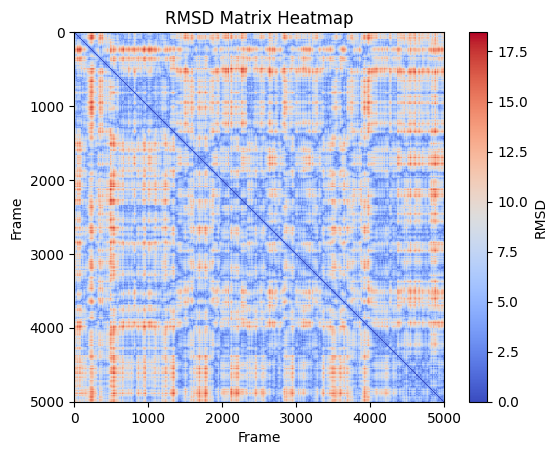

In [4]:

def read_rmsd_matrix(file_path):
    """
    Reads the lower triangular RMSD matrix from the file and returns it as a list of lists.
    """
    matrix = []
    with open(file_path, 'r') as f:
        for line in f:
            # Split by spaces, convert to float, and append the row to the matrix
            row = [float(x) for x in line.strip().split()]
            matrix.append(row)
    return matrix

def build_full_matrix(lower_matrix):
    """
    Rebuilds the full symmetric RMSD matrix from the lower triangular matrix.
    """
    size = len(lower_matrix)
    full_matrix = np.zeros((size, size))

    # Fill in the lower triangular part and use it to fill the symmetric upper part
    for i in range(size):
        for j in range(i + 1):
            full_matrix[i, j] = lower_matrix[i][j]
            full_matrix[j, i] = lower_matrix[i][j]
    
    return full_matrix

def plot_rmsd_matrix(matrix):
    """
    Plots the RMSD matrix as a heatmap using matplotlib.
    """
    plt.imshow(matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='RMSD')
    plt.title('RMSD Matrix Heatmap')
    plt.xlabel('Frame')
    plt.ylabel('Frame')
    plt.show()

# Main program
if __name__ == '__main__':
    # Step 1: Read the lower triangular matrix from the output file
    rmsd_file = 'rmsd_matrix.txt'  # Path to your output file
    lower_matrix = read_rmsd_matrix(rmsd_file)

    # Step 2: Rebuild the full symmetric RMSD matrix
    full_matrix = build_full_matrix(lower_matrix)

    # Step 3: Plot the RMSD matrix as a heatmap
    plot_rmsd_matrix(full_matrix)


(5001, 5001)


<AxesSubplot: >

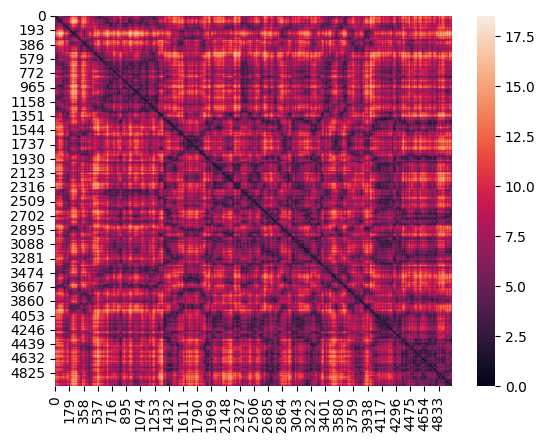

In [6]:
rmsd_mat = np.array(full_matrix)
print(rmsd_mat.shape)
sns.heatmap(rmsd_mat)

### CLUSTERING

/var/folders/q9/3_m1wtjn48qcqpr12gdycyhc0000gn/T/ipykernel_36644/4119459308.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(rmsd_mat, 'average')


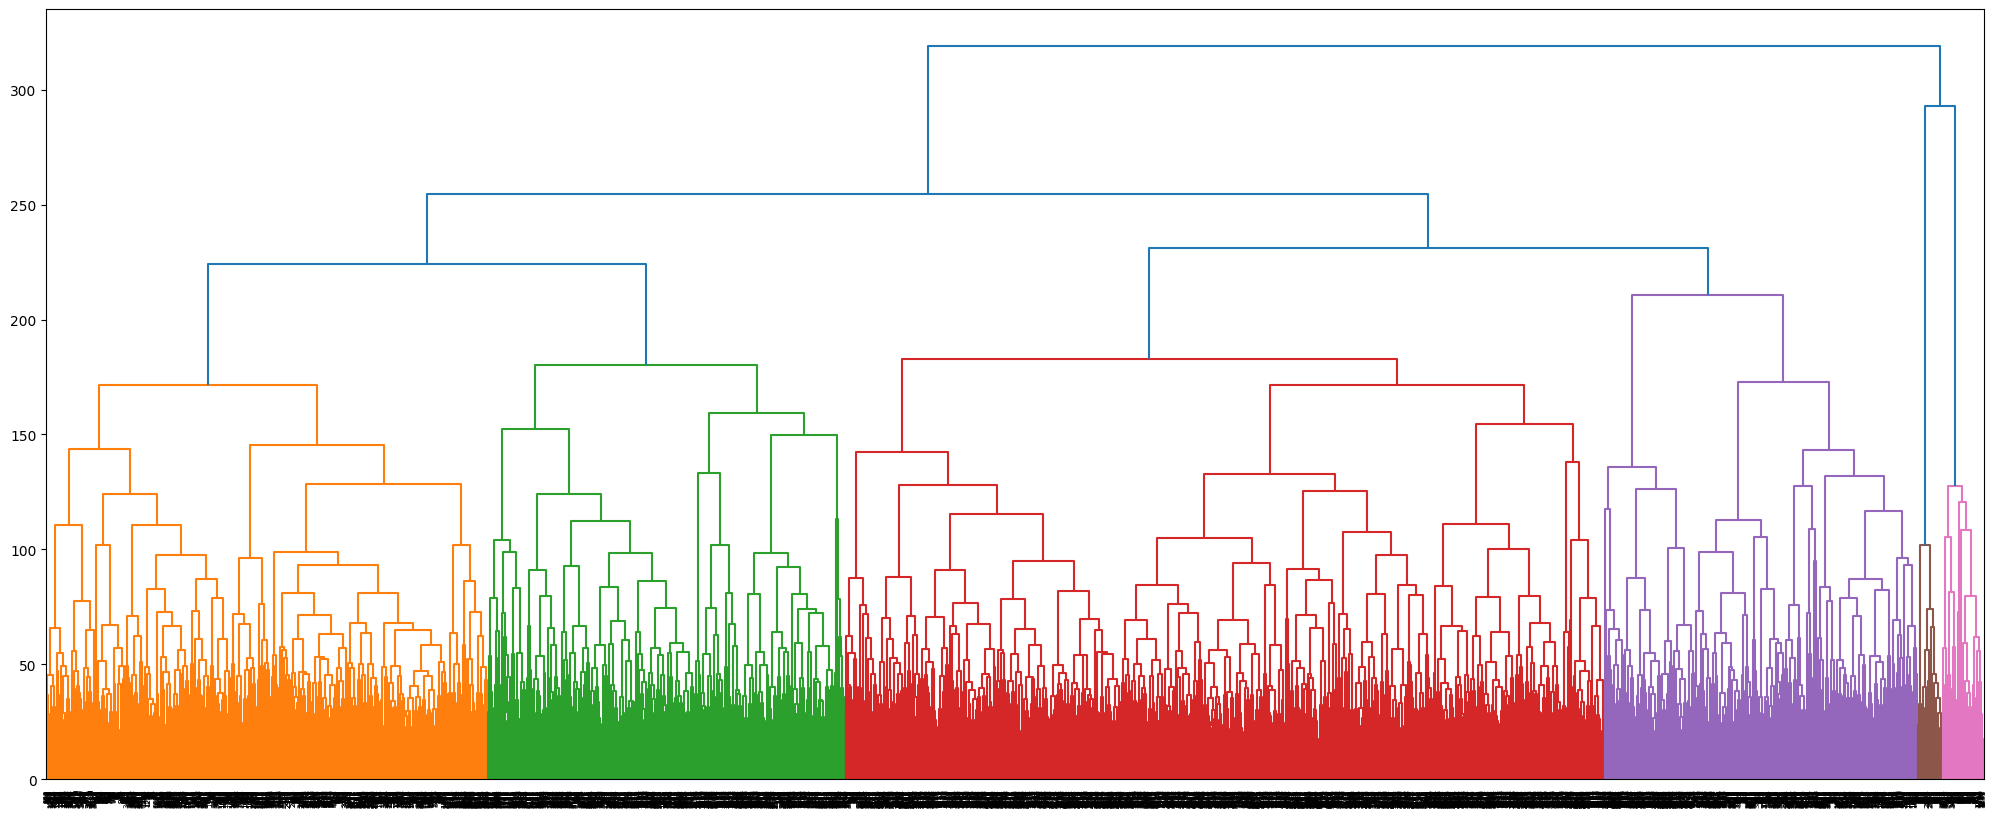

In [7]:
Z = linkage(rmsd_mat, 'average')

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
/Library/Frameworks/Python.framework/Ver

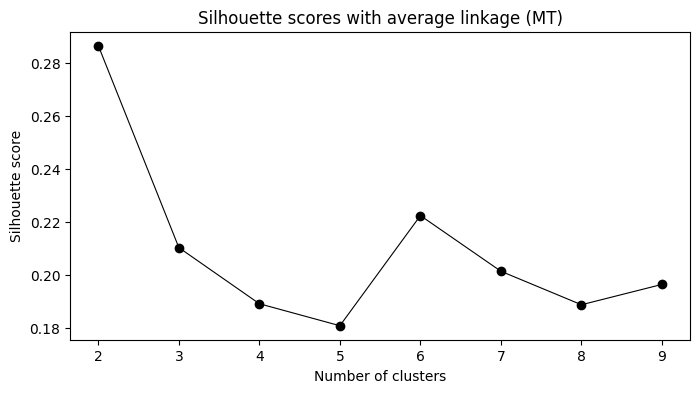

In [13]:
silhouette_avg_scores = []
k_range = range(2, 10)

for k in k_range:
    clustering = AgglomerativeClustering(n_clusters=k, linkage='average').fit(rmsd_mat)
    silhouette_avg = silhouette_score(rmsd_mat, clustering.labels_)
    silhouette_avg_scores.append(silhouette_avg)

plt.figure(figsize=(8,4))
plt.plot(k_range, silhouette_avg_scores, '-o', linewidth = 0.8, color = 'black')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette scores with average linkage (MT)')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


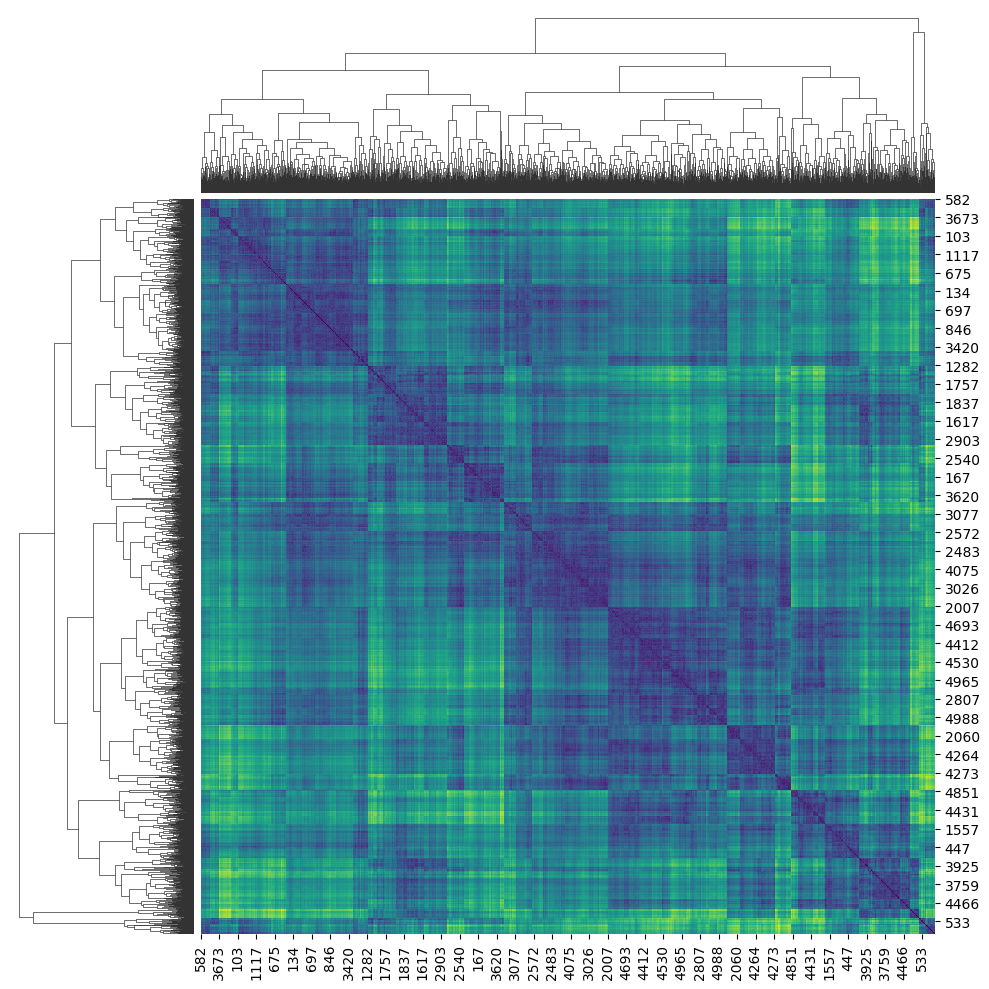

In [14]:
clustergrid = sns.clustermap(data=rmsd_mat, cmap='viridis', figsize=(10, 10), cbar_pos=None)


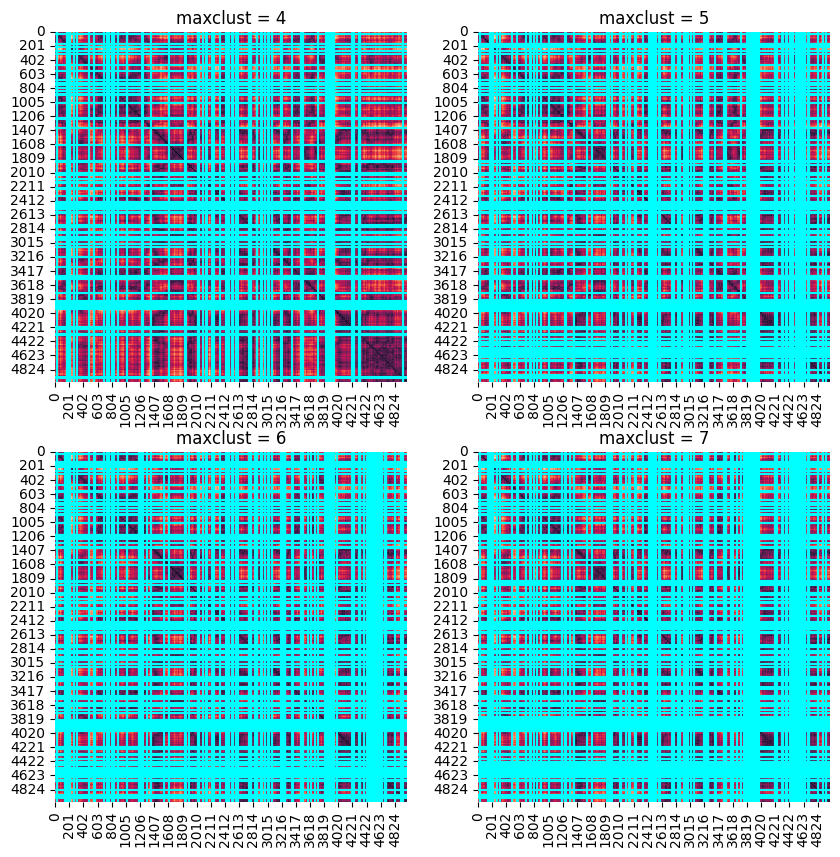

In [8]:
cl_labels_2 = fcluster(Z, t=2, criterion='maxclust')
clust2 = np.array(cl_labels_2)
indx_change2 = [i for i in range(1, len(clust2)) if clust2[i] != clust2[i-1]]

cl_labels_4 = fcluster(Z, t=4, criterion='maxclust')
clust4 = np.array(cl_labels_4)
indx_change4 = [i for i in range(1, len(clust4)) if clust4[i] != clust4[i-1]]

cl_labels_5 = fcluster(Z, t=5, criterion='maxclust')
clust5 = np.array(cl_labels_5)
indx_change5 = [i for i in range(1, len(clust5)) if clust5[i] != clust5[i-1]]

cl_labels_6 = fcluster(Z, t=6, criterion='maxclust')
clust6 = np.array(cl_labels_6)
indx_change6 = [i for i in range(1, len(clust6)) if clust6[i] != clust6[i-1]]

cl_labels_7 = fcluster(Z, t=7, criterion='maxclust')
clust7 = np.array(cl_labels_7)
indx_change7 = [i for i in range(1, len(clust7)) if clust7[i] != clust7[i-1]]


fig, axs = plt.subplots(2, 2, figsize=(10,10))
    
sns.heatmap(rmsd_mat, ax=axs[0, 0], cbar=False)
axs[0, 0].set_title('maxclust = 4')
for i in range(len(indx_change4)):
    axs[0, 0].axvline(indx_change4[i],c='cyan')
    axs[0, 0].axhline(indx_change4[i],c='cyan')
    
sns.heatmap(rmsd_mat, ax=axs[0, 1], cbar=False)
axs[0, 1].set_title('maxclust = 5')
for i in range(len(indx_change5)):
    axs[0, 1].axvline(indx_change5[i],c='cyan')
    axs[0, 1].axhline(indx_change5[i],c='cyan') 
    
sns.heatmap(rmsd_mat, ax=axs[1, 0], cbar=False)
axs[1, 0].set_title('maxclust = 6')
for i in range(len(indx_change6)):
    axs[1, 0].axvline(indx_change6[i],c='cyan')
    axs[1, 0].axhline(indx_change6[i],c='cyan') 

sns.heatmap(rmsd_mat, ax=axs[1, 1], cbar=False)
axs[1, 1].set_title('maxclust = 7')
for i in range(len(indx_change7)):
    axs[1, 1].axvline(indx_change7[i],c='cyan')
    axs[1, 1].axhline(indx_change7[i],c='cyan')
    
plt.show()

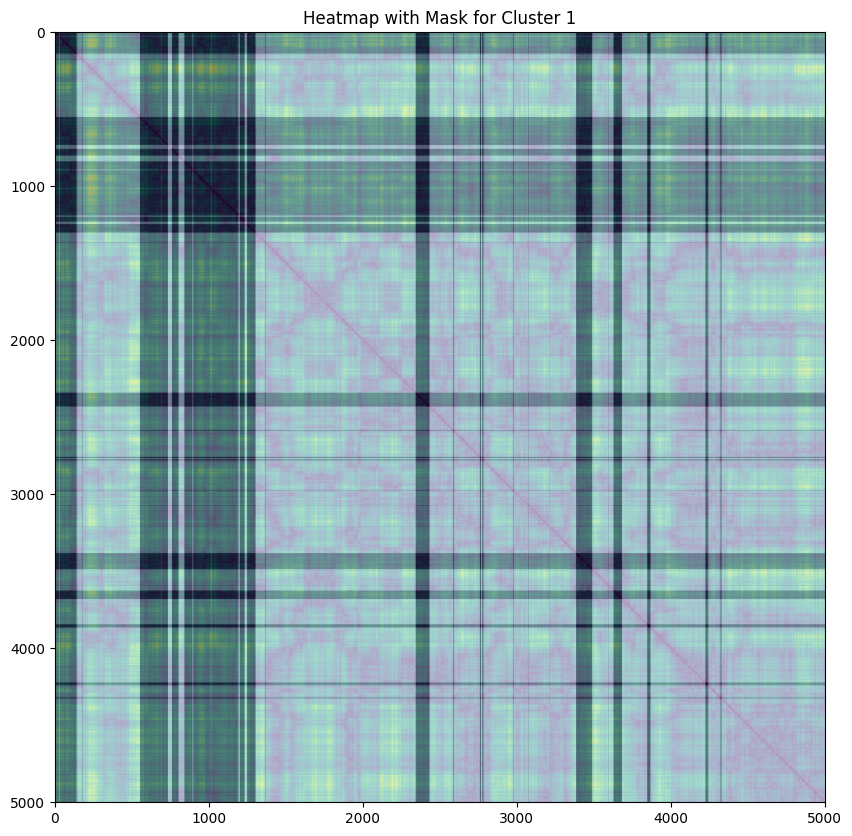

In [9]:
plt.figure(figsize = (10,10))
plt.title("Heatmap with Mask for Cluster 1")
# Choose the cluster you want to plot the mask for
cluster_to_plot = 1
# Identify indices where cluster label matches the desired cluster
indices_cluster = np.where(cl_labels_6 == cluster_to_plot)
# Create a 2D mask to select the entire regions for the y-axis where the cluster label matches the desired cluster
mask = np.zeros_like(rmsd_mat, dtype=bool)
mask[indices_cluster[0], :] = True
# Convert mask to float for plotting
mask = mask.astype(float)
rotated_mask = np.rot90(mask)
# Plot the heatmap
plt.imshow(rmsd_mat, cmap='viridis', interpolation='nearest')
# Overlay the mask to shade specific regions for the selected cluster
plt.imshow(mask, cmap='Greys', alpha=0.35)
plt.imshow(rotated_mask, cmap='Greys', alpha=0.35)

plt.show()

### ENTROPY OF CLUSTERING

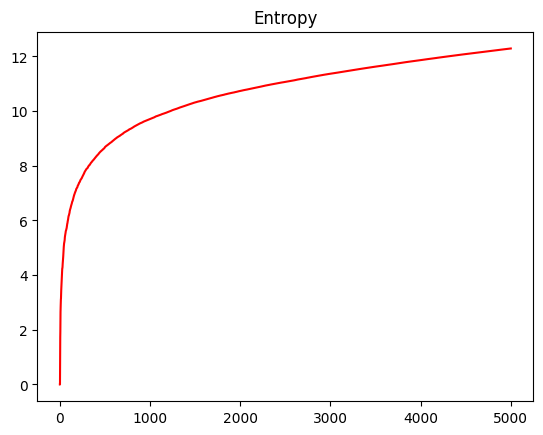

In [18]:
N = 5001 #total number of frames
entropy = np.zeros(N+1)

for i in range(1,N+1):
    cl_Labels_i = AgglomerativeClustering(n_clusters=i, metric="precomputed", linkage='average').fit_predict(rmsd_mat)
    list_i = cl_Labels_i.tolist()
    comp_entropy = 0
    for j in range(0,i):
        prob_j = list_i.count(j)/N
        comp_entropy = comp_entropy + prob_j * np.log2(prob_j)
    entropy[i] = -comp_entropy
    
    
plt.title("Entropy")
plt.plot(entropy, color="red")

plt.show()